In [1]:
using Plots
#using Interact
using Distributions
using RandomMatrices

┌ Info: Recompiling stale cache file C:\Users\matte\.julia\compiled\v1.2\RandomMatrices\vcDqM.ji for RandomMatrices [2576dda1-a324-5b11-aa66-c48ed7e3c618]
└ @ Base loading.jl:1240


In [2]:
function G(couple, wait)
    i, j = couple[1], couple[2]
    if(i==1 && j==1)
        return 0
    elseif(i==1)
        return G((i, j-1), wait) + 1 + wait[i, j]
    elseif(j==1)
        return G((i-1, j), wait) + 1 + wait[i, j]
    else
        return max(G((i, j-1), wait), G((i-1, j), wait)) + 1 + wait[i, j]
    end
end

function m_G(wait)
    memg = zeros(N, N) .- 1 #trunc.(Int, zeros(N,N)) .- 1
    memg[1, 1] = 0
    function tmp_G(i, j, wait)
        if(memg[i, j] == -1)
            if(i==1)
                res1 = tmp_G(i, j-1, wait)
                memg[i, j-1] = res1
                res = res1 + 1 + wait[i, j]
            elseif(j==1)
                res1 = tmp_G(i-1, j, wait)
                memg[i-1, j] = res1
                res = res1 + 1 + wait[i, j]
            else
                res1 = tmp_G(i, j-1, wait)
                res2 = tmp_G(i-1, j, wait)
                memg[i, j-1] = res1
                memg[i-1, j] = res2
                res = max(res1, res2) + 1 + wait[i, j]
            end
            memg[i, j] = res
        end
        return memg[i, j]
    end
    tmp_G(size(wait)[1], size(wait)[2], wait)
    return memg
end

m_G (generic function with 1 method)

In [63]:
res = Float64[]
N = 50
for i in 1:10000
    wait = rand(Exponential(1), N, N);
    tnn = m_G(wait)[N, N]
    append!(res, tnn)
end 

In [64]:
function tw_pdf(xs, step)
    c = cdf(TracyWidom, vcat(vcat(xs[1]-step,xs),xs[end]+step))
    d = (diff(c)[1:end-1]+diff(c)[2:end]) / (2*step)
    return d
end

tw_pdf (generic function with 2 methods)

In [65]:
step = 0.1
min_, max_ = -6, 6
xs = min_:step:max_

-6.0:0.1:6.0

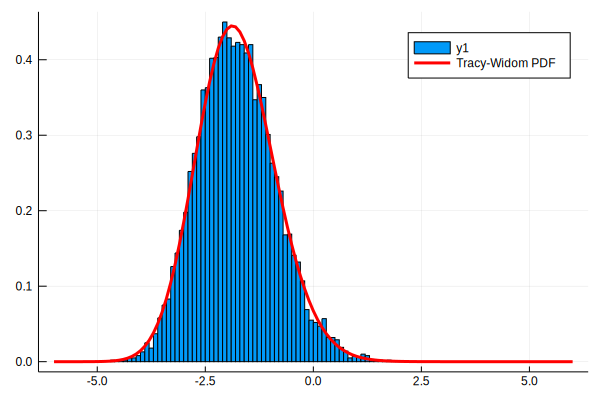

In [66]:
mu_tw = -1.771
var_tw = 0.813
norm_res = mu_tw .+ sqrt(var_tw)*((res .- mean(res)) / std(res))
histogram(norm_res, normalize=true, bins=100)
plot!(xs, tw_pdf(xs, step), lw = 3, color = "red", label = "Tracy-Widom PDF")

In [ ]:
## Add Interact plot
## Find the right normalization
## Add option to specify randomness